<a href="https://colab.research.google.com/github/hassanmohamed552/bank-customer-segmentation/blob/main/Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df =pd.read_csv('/content/Bank_Churn.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df_new=df.drop(['Exited','CustomerId','Surname'],axis=1)
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:

df_curated=pd.get_dummies(df_new,columns=['Geography','Gender'])
df_curated['Gender_Male']=df_curated['Gender_Male'].astype(int)
df_curated['Geography_France']=df_curated['Geography_France'].astype(int)
df_curated['Geography_Germany']=df_curated['Geography_Germany'].astype(int)
df_curated['Geography_Spain']=df_curated['Geography_Spain'].astype(int)
df_curated['Gender_Female']=df_curated['Gender_Female'].astype(int)



df_curated.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [9]:
df_curated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_France   10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Female      10000 non-null  int64  
 12  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


In [8]:
df_curated.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


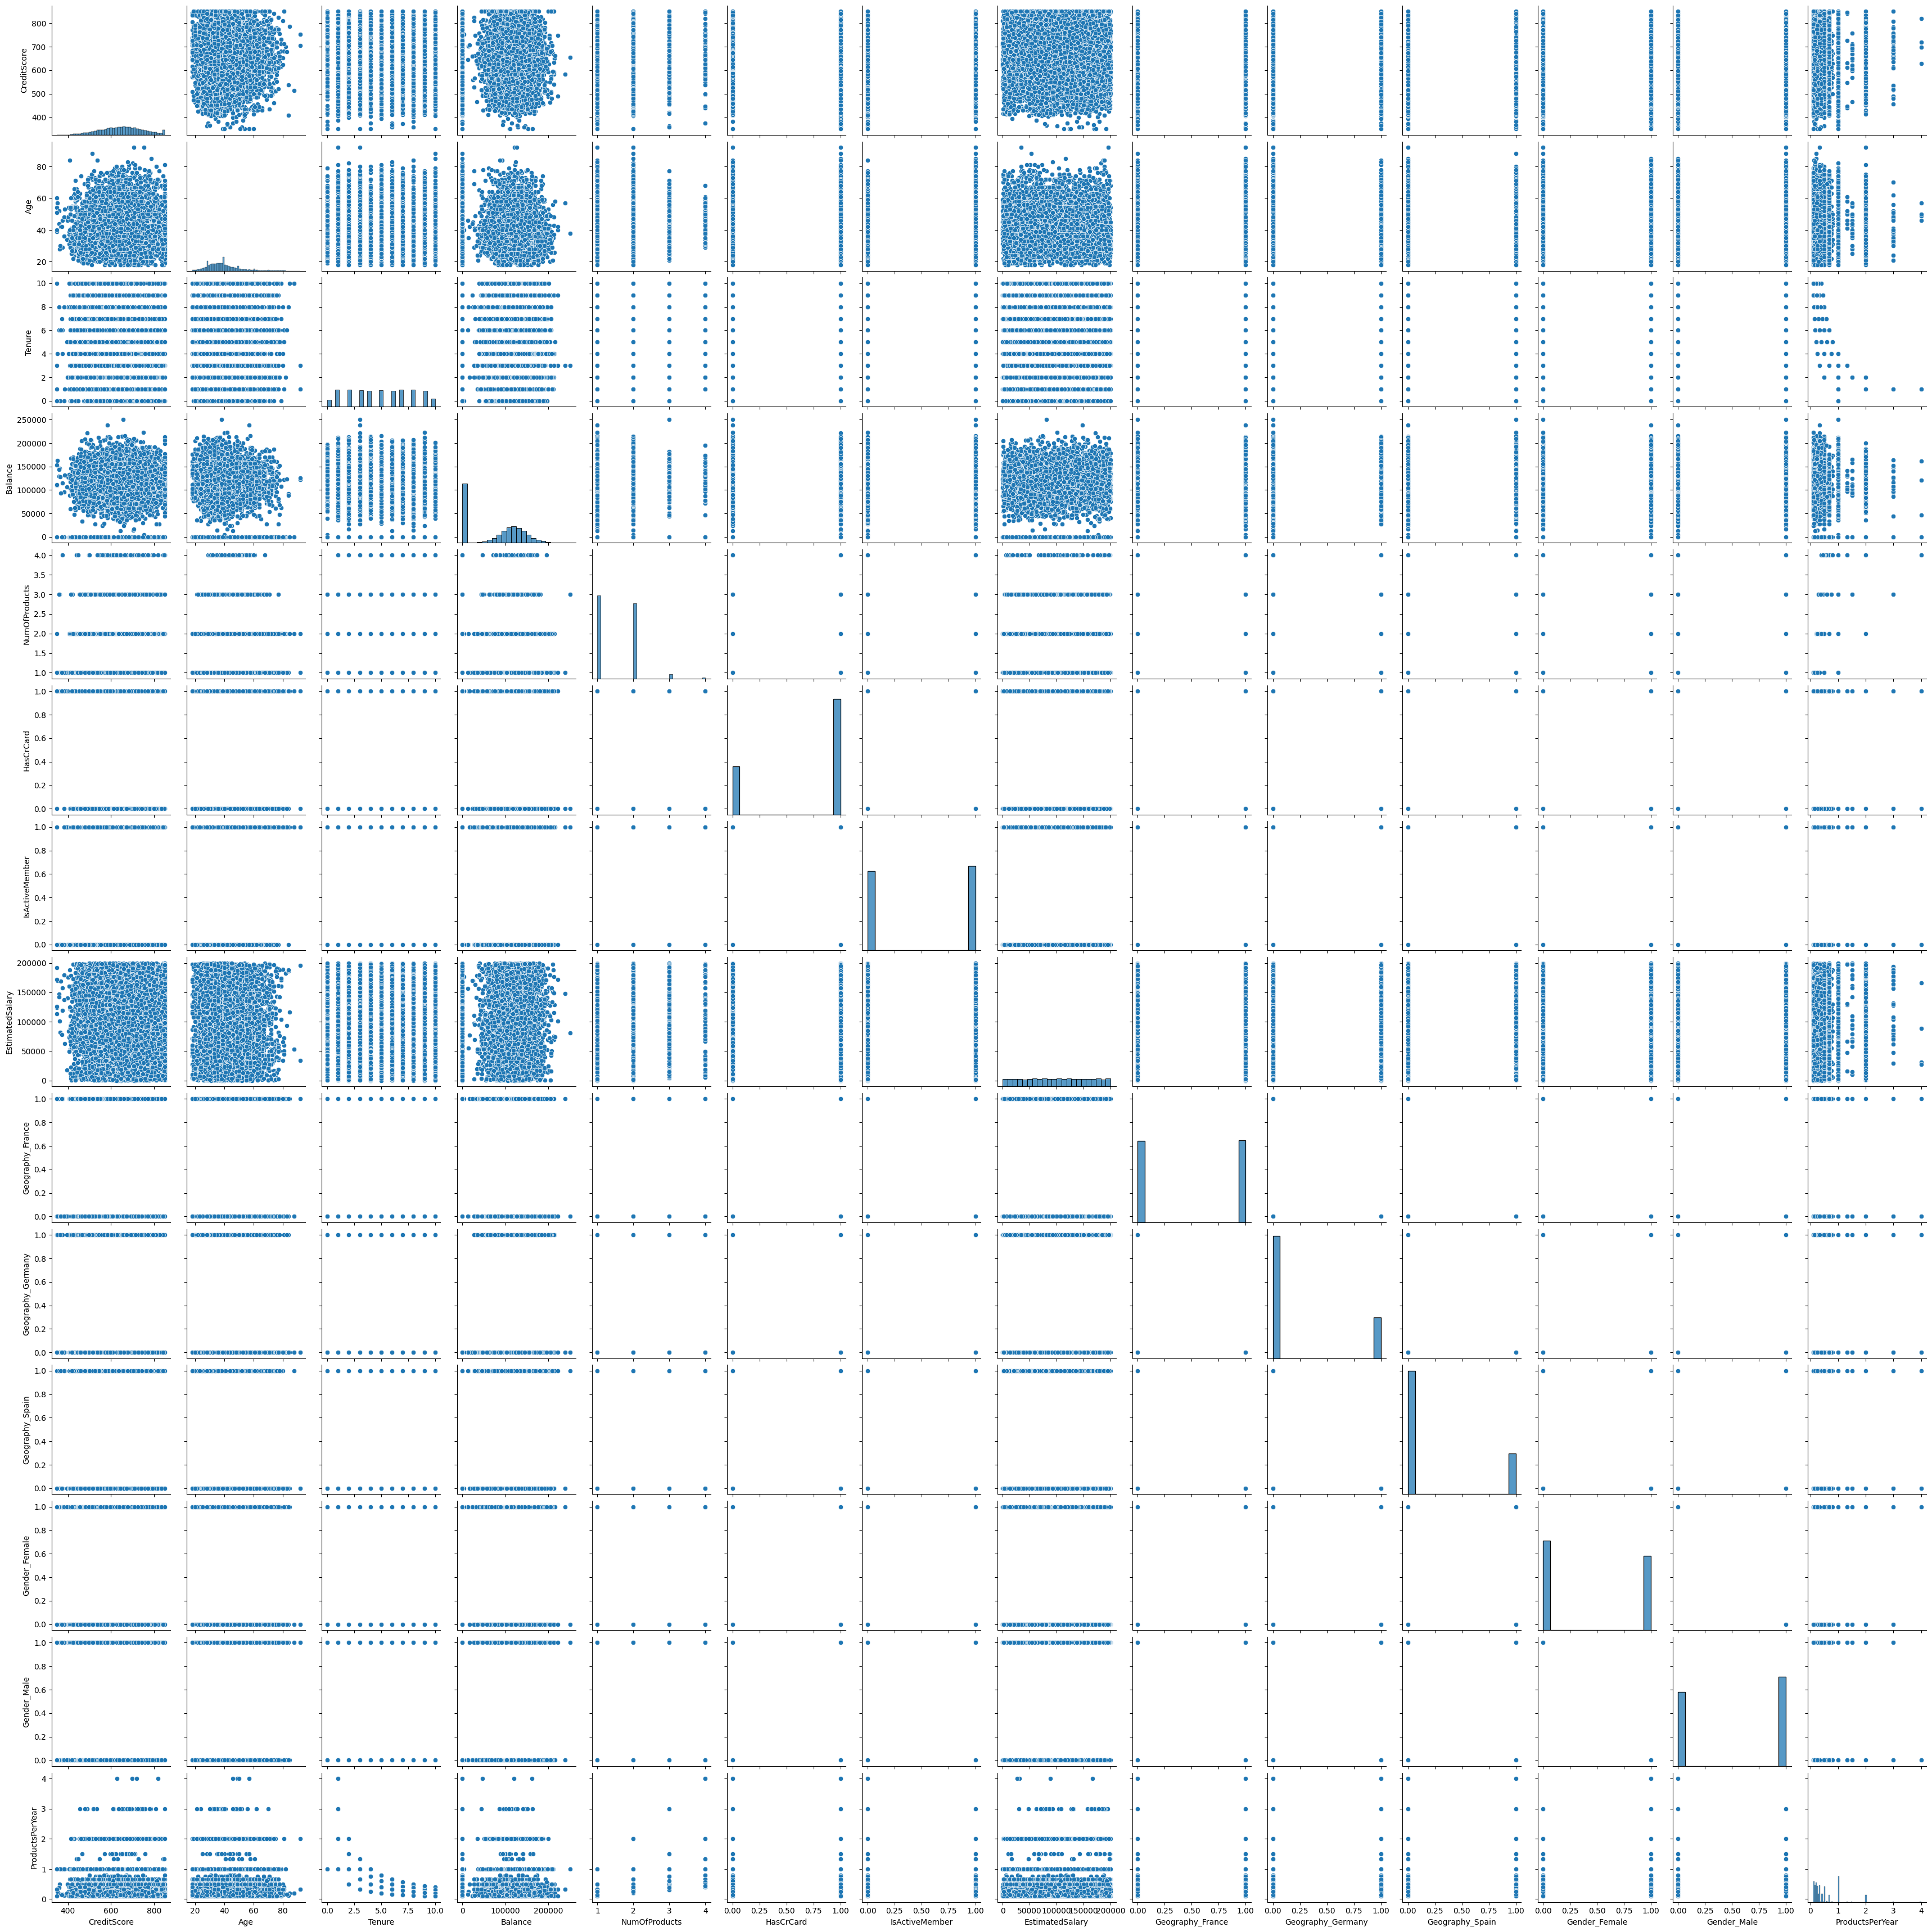

In [34]:
sns.pairplot(df_curated)

In [17]:
df_curated['ProductsPerYear']=df_curated['NumOfProducts']/df_curated['Tenure']
df_curated.replace([np.inf, -np.inf], 1, inplace=True)

df_curated.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,ProductsPerYear
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,0.500
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,1.000
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,0.375
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,2.000
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0.500


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [18]:
ss=StandardScaler()
df_scaled=ss.fit_transform(df_curated)
df_scaled=pd.DataFrame(df_scaled,columns=df_curated.columns)
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,ProductsPerYear
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,0.997204,-0.578736,-0.573809,1.095988,-1.095988,0.020839
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-1.002804,-0.578736,1.742740,1.095988,-1.095988,1.086516
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.997204,-0.578736,-0.573809,1.095988,-1.095988,-0.245581
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.997204,-0.578736,-0.573809,1.095988,-1.095988,3.217871
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-1.002804,-0.578736,1.742740,1.095988,-1.095988,0.020839


In [19]:
df_scaled.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,ProductsPerYear
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.824585e-16,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,-5.258016e-17,-7.389644e-17,-2.877698e-17,2.096101e-17,-7.069900e-17,-4.689582e-17,-2.131628e-18,1.314504e-16,-4.352074e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-1.740268e+00,-1.002804e+00,-5.787359e-01,-5.738092e-01,-9.124191e-01,-1.095988e+00,-8.317032e-01
25%,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-1.547768e+00,-1.030670e+00,-8.535935e-01,-1.002804e+00,-5.787359e-01,-5.738092e-01,-9.124191e-01,-1.095988e+00,-6.185678e-01
50%,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,6.460917e-01,9.702426e-01,1.802807e-03,9.972039e-01,-5.787359e-01,-5.738092e-01,-9.124191e-01,9.124191e-01,-3.343871e-01
75%,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,6.460917e-01,9.702426e-01,8.572431e-01,9.972039e-01,1.727904e+00,-5.738092e-01,1.095988e+00,9.124191e-01,3.760644e-01
max,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,6.460917e-01,9.702426e-01,1.737200e+00,9.972039e-01,1.727904e+00,1.742740e+00,1.095988e+00,9.124191e-01,7.480580e+00


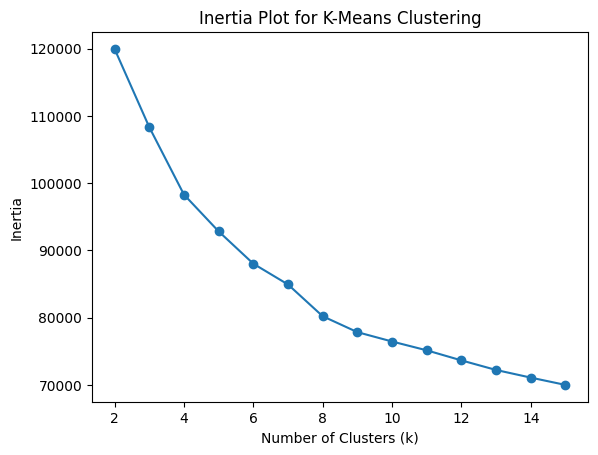

In [31]:

inertia = []
cluster_range = range(2, 16)  # 2 to 15 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)  # Initialize KMeans
    kmeans.fit(df_scaled)  # Fit to scaled data
    inertia.append(kmeans.inertia_)  # Append inertia to list

# Create the inertia plot
plt.plot(cluster_range, inertia, marker='o')
plt.title('Inertia Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [32]:
from collections import Counter

k5=KMeans(n_clusters=5,n_init=10,random_state=42)
k5.fit(df_scaled)
k5_labels=k5.labels_
print(Counter(k5_labels))


Counter({1: 2602, 2: 2381, 4: 2368, 3: 2137, 0: 512})


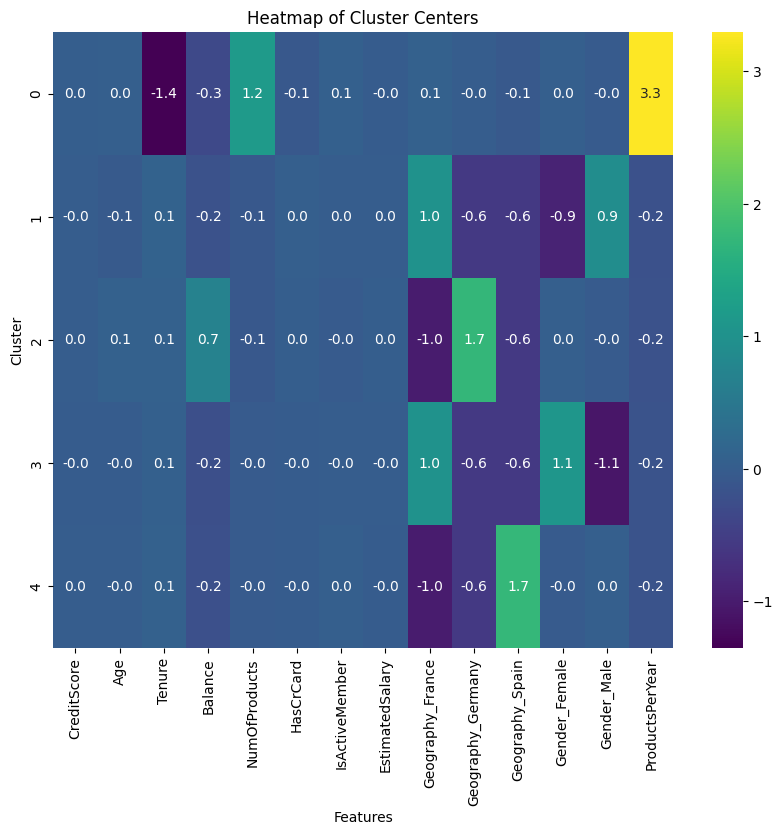

In [33]:
cluster_centers = k5.cluster_centers_
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_centers, annot=True, fmt=".1f", cmap="viridis",
            xticklabels=df_scaled.columns, yticklabels=range(0, 5))
plt.title("Heatmap of Cluster Centers")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

Cluster 0:customers who actively use more products and relatively new

---


Cluster 1:mostly male customers from France age about (35-38) relatively low products

---


Cluster 2:customers mostly fom Germany who has relatively high
balance and relatively low products


---

Cluster 3:mostly female customers from France age about (35-38)

---

cluster 4:customers from spain


In [44]:
df2=df_new.copy()

In [48]:

df2['Gender']=np.where(df2['Gender']=='Male',1,0)
df_pivot=df2.groupby('Geography').mean()
df_pivot.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Geography,,,,,,,,,
France,649.668329,0.549063,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814
Germany,651.453567,0.524512,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102
Spain,651.333872,0.560355,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281


In [49]:
df2.drop('Geography',axis=1,inplace=True)
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,0,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57
3,699,0,39,1,0.00,2,0,0,93826.63
4,850,0,43,2,125510.82,1,1,1,79084.10


In [50]:
df_scaled2=df_scaled.drop(['Geography_France','Geography_Spain','Geography_Germany'],axis=1)
df_scaled2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,ProductsPerYear
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.095988,-1.095988,0.020839
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.095988,-1.095988,1.086516
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.095988,-1.095988,-0.245581
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1.095988,-1.095988,3.217871
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,1.095988,-1.095988,0.020839


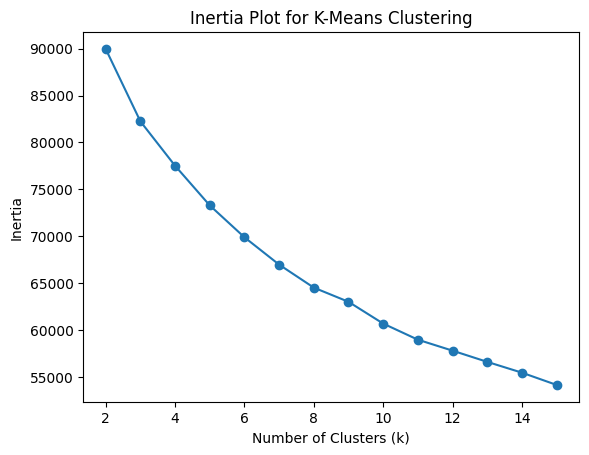

In [51]:

inertia2 = []
cluster_range = range(2, 16)  # 2 to 15 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)  # Initialize KMeans
    kmeans.fit(df_scaled2)  # Fit to scaled data
    inertia2.append(kmeans.inertia_)  # Append inertia to list

# Create the inertia plot
plt.plot(cluster_range, inertia2, marker='o')
plt.title('Inertia Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [52]:

k4=KMeans(n_clusters=4,n_init=10,random_state=42)
k4.fit(df_scaled2)
k4_labels=k4.labels_
print(Counter(k4_labels))


Counter({3: 3551, 1: 3092, 0: 2078, 2: 1279})


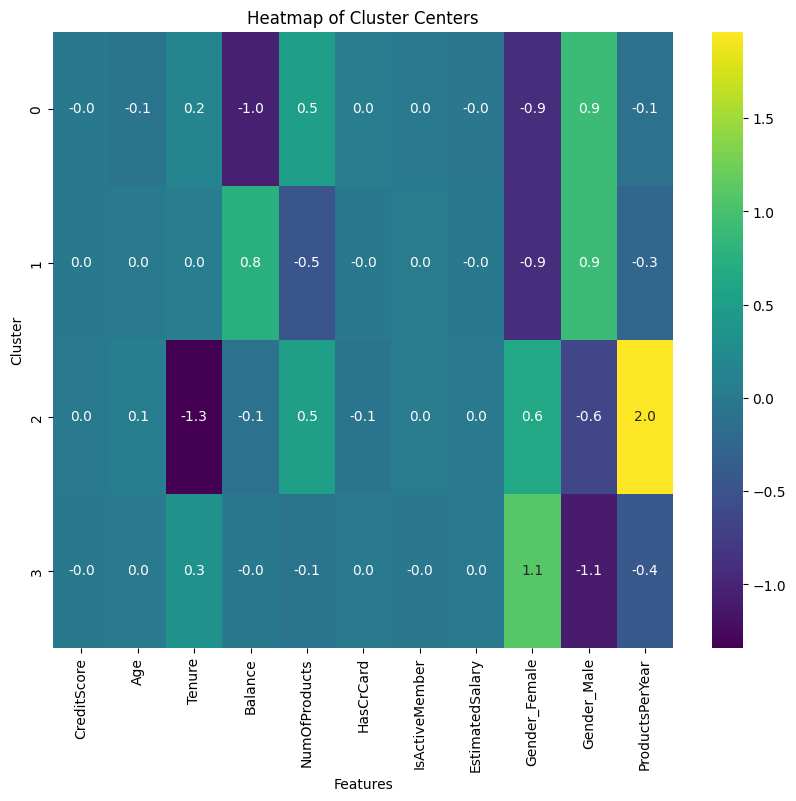

In [53]:
cluster_centers2 = k4.cluster_centers_
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_centers2, annot=True, fmt=".1f", cmap="viridis",
            xticklabels=df_scaled2.columns, yticklabels=range(0, 4))
plt.title("Heatmap of Cluster Centers")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

Cluster 0:male customers who actively use more products and less balance and more products overall

---


Cluster 1: male customers with relatively high balance and use less products

---


Cluster 2:customers who are relatively new and use more products

---

Cluster 3:mostly female customers who are high tenured and use less products



In [57]:
df_final=pd.concat([df_curated,pd.Series(k4_labels),df.Exited],axis=1)
df_final.rename(columns={0:'Cluster'},inplace=True)
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,ProductsPerYear,Cluster,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,0.500,3,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,1.000,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,0.375,3,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,2.000,2,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0.500,3,0


In [83]:
exited_ratio=df_final.groupby('Cluster').mean()
exited_ratio.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,ProductsPerYear,Exited
Cluster,,,,,,,,,,,,,,,
0,650.043311,38.144370,5.486044,10963.453542,1.823869,0.725217,0.522137,98412.998229,0.617421,0.069779,0.312801,0.000000,1.000000,0.439174,0.130414
1,650.535252,38.993208,5.136158,123654.011908,1.254851,0.701164,0.523933,100041.739392,0.426261,0.355757,0.217982,0.000000,1.000000,0.372542,0.186287
2,651.534793,39.566849,1.138389,70409.270383,1.831118,0.673964,0.527756,100973.415911,0.494918,0.275997,0.229085,0.775606,0.224394,1.411910,0.248632
3,650.444945,39.082230,6.023937,75946.261554,1.489721,0.709096,0.498733,100795.869147,0.501267,0.256547,0.242185,1.000000,0.000000,0.290591,0.245565


recommendations:

*   Cluster 0: increase customized products for french males
*   Cluster 1: increase customized products for savings accounts

*   Cluster 2: increase customized products for female customers
*   Cluster 3: increase customized products for loyal female customers



